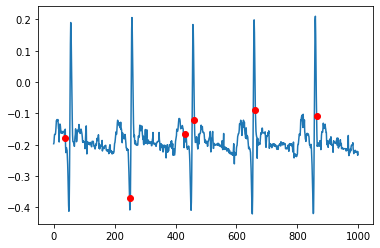

In [13]:
from ecgdetectors import Detectors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
fs=100 # sample freq

heartbeat = pd.read_csv("data_alat_baru.csv", sep=';')

detectors = Detectors(fs)

r_peaks_pan = detectors.pan_tompkins_detector(heartbeat.iloc[:,6][0:1000])
r_peaks_pan= np.asarray(r_peaks_pan)

plt.plot(heartbeat.iloc[:,6][0:1000])
plt.plot(r_peaks_pan,heartbeat.iloc[:,6][0:1000][r_peaks_pan], 'ro')

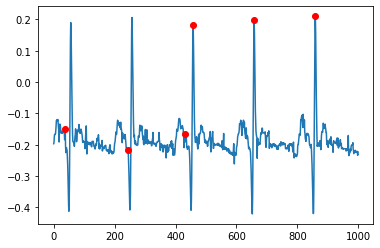

In [16]:
def R_correction(signal, peaks):

    num_peak=peaks.shape[0]
    peaks_corrected_list=list()
    for index in range(num_peak):
        i=peaks[index]
        cnt=i
        if cnt-1<0:
            break
        if signal[cnt]<signal[cnt-1]:
            while signal[cnt]<signal[cnt-1]:
                cnt-=1
                if cnt<0:
                    break
        elif signal[cnt]<signal[cnt+1]:
            while signal[cnt]<signal[cnt+1]:
                cnt+=1
                if cnt<0:
                    break
        peaks_corrected_list.append(cnt)
    peaks_corrected=np.asarray(peaks_corrected_list)            
    return peaks_corrected 

corrected_R_peak=R_correction(heartbeat.iloc[:,6][0:1000],r_peaks_pan)
plt.plot(heartbeat.iloc[:,6][0:1000])
plt.plot(corrected_R_peak,heartbeat.iloc[:,6][0:1000][corrected_R_peak], 'ro')